# Projeto Simulação 3 - Rede Trófica
  ### Mateus Vespasiano de Castro, RA: 159505
  ### Marcos Vinicius Gasparoto Bauab, RA: 156717
  ### Luiz Fernando de Cristo Moloni, RA: 159325

# Descrição Geral da Simulação

Rede Trófica é a representação gráfica das relações predatórias existentes em uma comunidade ecológica, ou seja, das relações alimentares entre os organismos de uma comunidade. Desse modo, realizamos a simulação de uma rede de interações,
onde um certo número de espécies convivem em um mesmo ambiente, podendo ocorrer predação e competição, modulando a população de cada espécie.

Portanto, usamos o Modelo de Lotka-Volterra, que é definido pelas seguintes equações:

$$
\frac{dP}{dt} = P(\alpha V - \beta)
$$

$$
\frac{dV}{dt} = V(\lambda - \phi P)
$$

onde:
<ul>
  <li>$P(t) → $ se refere à população de predadores</li>
  <li>$V(t) → $ se refere à população de presas</li>
</ul>

Assim, aplicando os parâmetros da simulação neste modelo obtemos as seguintes equações:

Plantas $(P):$

$$
\frac{dP}{dt} = P(\alpha (1- \frac{P}{k}) - \alpha_{1}V - \alpha_{2}J - \alpha_{3}R)
$$

sendo k a capacidade do ambiente (saturação).

Vacas $(V):$

$$
\frac{dV}{dt} = V(\beta_{1}P - \beta_{2}O - \beta)
$$

Joaninha $(J):$

$$
\frac{dJ}{dt} = J(\gamma_{1}P - \gamma_{2}C -\gamma)
$$

Ratos $(R):$

$$
\frac{dR}{dt} = R(\delta_{1}P - \delta_{2}O -\delta_{3}C - \delta)
$$

Onças $(O):$

$$
\frac{dO}{dt} = O(\lambda_{1}V + \lambda_{2}R - \lambda)
$$
 
Corujas $(C):$

$$
\frac{dC}{dt} = C(\sigma_{1}J + \sigma_{2}R - \sigma)
$$

 Para solucionarmos as Equações Diferenciais Ordinários, usamos o Método de Euler, desse modo aproximamos os resultados, obtendo:

$Plantas (P) ⇒ $ 
$$P(t + Δt) = P(t) + P(\alpha (1- \frac{P}{k}) - \alpha_{1}V - \alpha_{2}J - \alpha_{3}R)Δt
$$

$Vacas (V) ⇒ $ 
$$V(t + Δt) = V(t) + V(\beta_{1}P - \beta_{2}O - \beta)Δt
$$

$Joaninha (J) ⇒ $ 
$$J(t + Δt) = J(t) + J(\gamma_{1}P - \gamma_{2}C -\gamma)Δt
$$

$Ratos (R) ⇒ $ 
$$R(t + Δt) = R(t) + R(\delta_{1}P - \delta_{2}O -\delta_{3}C - \delta) Δt
$$

$Onça (O) ⇒ $ 
$$O(t + Δt) = O(t) + O(\lambda_{1}V + \lambda_{2}R - \lambda)Δt
$$

$Corujas (C) ⇒ $ 
$$C(t + Δt) = C(t) + C(\sigma_{1}J + \sigma_{2}R - \sigma)Δt
$$


#Tabela de Relação Presa-Predador

Tabela que demonstra as relações entre presa e predador, quantificando a influência que cada indivíduo (linha i) exerce sobre os outros indivíduos (coluna j), que neste caso está sendo representada pelas variáveis : α, β, γ, δ, λ, σ . A partir desta tabela foi possivel montar as equações diferenciais do Modelo Lokta-Volterra para cada população, já que a facilita a visualizção das interações entre cada espécie.

$$ \begin{array}{|c|c|} \hline
           & Plantas & Vacas & Joaninhas  & Ratos & Onças & Corujas\\ \hline
Plantas    &\alpha   &\beta_{1}  &\gamma_{1}  &\delta_{1}   &-   &- \\ \hline
Vacas      &\alpha_{1}  &\beta   &-         &-   &\lambda_{1}   &- \\ \hline
Joaninhas  &\alpha_{2}  &-    &\gamma     &-   &-    &\sigma_{1} \\ \hline
Ratos      &\alpha_{3}  &-    &-    &\delta  &\lambda_{2}  &\sigma_{2} \\ \hline
Onças      &-      &\beta_{2} &-       &\delta_{2}   &\lambda   &- \\ \hline
Corujas    &-      &-     &\gamma_{2}  &\delta_{3}   &-   &\sigma \\ \hline
\end{array}
$$


##Representação da rede trófica utilizada:

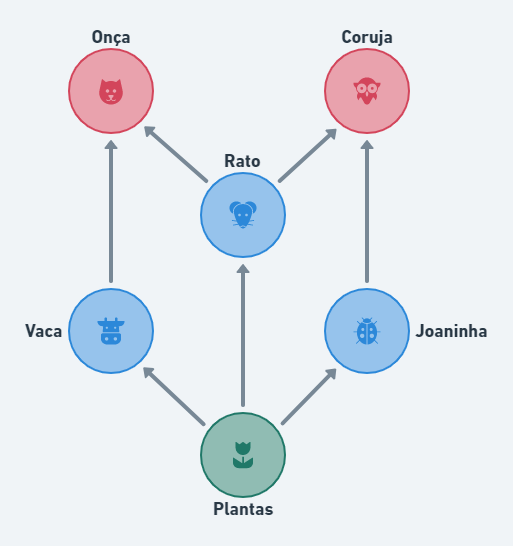


#Simulação - Rede Trófica

##Rede Trófica Instável



Neste momento a rede se encontra completamente instável, já que ouve a extinção de duas espécies (onças e corujas). Esta foi a primeira instância da rede com os seguintes parâmetros:

```
plantas = Especie(N=50, p=[10, 0.1, 0.1, 0.2], k=50)

    # Cria a espécie dos ratos e seus coeficientes

    rato = Especie(N=30, p=[1.75, 0.175, 0.9, 0.9], k=30)

    # Cria a espécie coelhos e seus coeficientes

    oncas = Especie(N=15, p=[8.5, 0.1, 0.1], k=15)

    # Cria a espécie das vacas e seus coeficientes

    vacas = Especie(N=85, p=[0.8, 0.5, 0.5], k=40)

    # Cria a espécie joaninha e seus coeficientes

    joaninha = Especie(N=35, p=[2.25, 0.95, 0.6], k=35)

    # Cria a espécie Passáro e seus coeficientes

    coruja = Especie(N=30, p=[8.5, 0.5, 0.5], k=30)
```


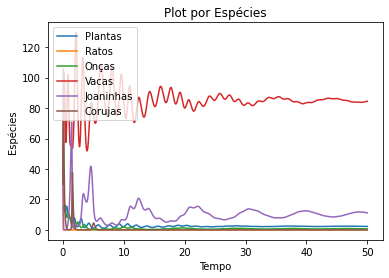

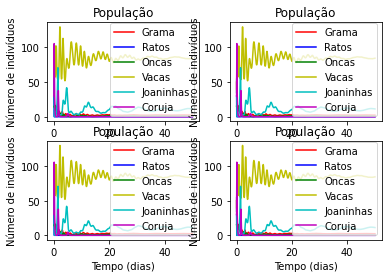

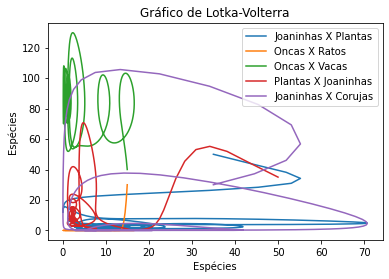

##Rede Trófica Estável 
São feitas diversas simulações com o objetivo de estabilizar a rede de interações

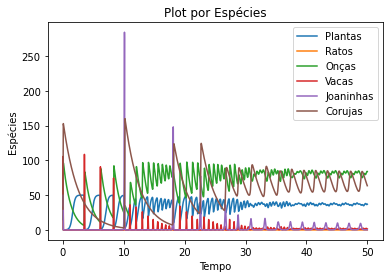

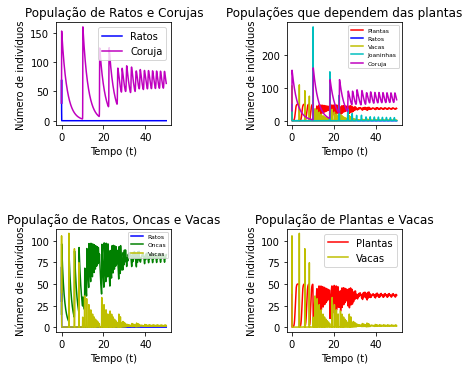

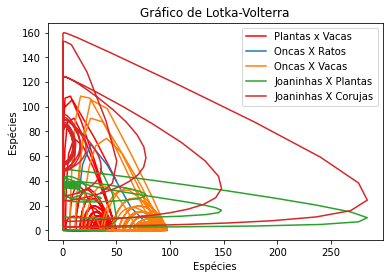

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

# N(t) número de indivíduos de uma população em função do tempo
# Considera que a população cresce a uma razão Alpha na ausência de fatores limitantes
# P é a ppulação de predadores

i = 0
t = 5000  # tempo
k = 200  # representa a capacidade de suporte do ambiente (saturação)
deltaT = 0.01
T = np.arange(0, t * 0.01, deltaT)


class Especie:
    def __init__(self, N, p=None, k=None):
        self.N = N
        self.p = p
        self.k = k
        self.vetor = [N]


class Plots:
    def __init__(self, plantas=None, rato=None, oncas=None, vacas=None, joaninhas=None, coruja=None):
        self.plantas = plantas
        self.rato = rato
        self.oncas = oncas
        self.vacas = vacas
        self.joaninhas = joaninhas
        self.coruja = coruja

    def individuosPeloTempo(self, plantas=None, rato=None, oncas=None, vacas=None, joaninhas=None, coruja=None):
        """
        Plota o gráfico de N(t)
        """
        # Plota o gráfico de cada indivíduo em função do tempo
        plt.plot(T, plantas, label='Plantas')
        plt.plot(T, rato, label='Ratos')
        plt.plot(T, oncas, label='Onças')
        plt.plot(T, vacas, label='Vacas')
        plt.plot(T, joaninhas, label='Joaninhas')
        plt.plot(T, coruja, label='Corujas')
        plt.xlabel('Tempo')
        plt.ylabel('Espécies')
        plt.title("Plot por Espécies")
        plt.legend()

    def PlotGeral(self, plantas=None, rato=None, oncas=None, vacas=None, joaninhas=None, coruja=None):
        fig, ax = plt.subplots(2, 2)

        ax[0, 0].plot(T, rato, 'b', label='Ratos')
        ax[0, 0].plot(T, coruja, 'm', label='Coruja')
        ax[0, 0].set_xlabel('Tempo (t)')
        ax[0, 0].set_ylabel('Número de indivíduos')
        ax[0, 0].legend()
        ax[0, 0].set_title('População de Ratos e Corujas')

        ax[0, 1].plot(T, plantas, 'r', label='Plantas')
        ax[0, 1].plot(T, rato, 'b', label='Ratos')
        ax[0, 1].plot(T, vacas, 'y', label='Vacas')
        ax[0, 1].plot(T, joaninhas, 'c', label='Joaninhas')
        ax[0, 1].plot(T, coruja, 'm', label='Coruja')
        ax[0, 1].set_xlabel('Tempo (t)')
        ax[0, 1].set_ylabel('Número de indivíduos')
        ax[0, 1].legend(loc = 'upper right', fontsize=6)
        ax[0, 1].set_title('Populações que dependem das plantas')

        ax[1, 0].plot(T, rato, 'b', label='Ratos')
        ax[1, 0].plot(T, oncas, 'g', label='Oncas')
        ax[1, 0].plot(T, vacas, 'y', label='Vacas')
        ax[1, 0].set_xlabel('Tempo (t)')
        ax[1, 0].set_ylabel('Número de indivíduos')
        ax[1, 0].legend(loc = 'upper right', fontsize=6)
        ax[1, 0].set_title('População de Ratos, Oncas e Vacas')

        ax[1, 1].plot(T, plantas, 'r', label='Plantas')
        ax[1, 1].plot(T, vacas, 'y', label='Vacas')
        ax[1, 1].set_xlabel('Tempo (t)')
        ax[1, 1].set_ylabel('Número de indivíduos')
        ax[1, 1].legend()
        ax[1, 1].set_title('População de Plantas e Vacas')
        plt.subplots_adjust(wspace=1, hspace=1, top=1.2, right=0.9, left=0.1)
        plt.show()

    def Volterra(self, plantas=None, rato=None, oncas=None, vacas=None, joaninhas=None, coruja=None):
        """
        Plota o gráfico de LOTKA-VOLTERRA

        """

        plt.plot(plantas, vacas, 'r', label='Plantas x Vacas')
        plt.plot(oncas, rato, label='Oncas X Ratos')
        plt.plot(oncas, vacas, label='Oncas X Vacas')
        plt.plot(joaninhas, plantas, label='Joaninhas X Plantas')
        plt.plot(joaninhas, coruja, label='Joaninhas X Corujas')
        plt.xlabel('Espécies')
        plt.ylabel('Espécies')
        plt.title("Gráfico de Lotka-Volterra")
        plt.legend()


if __name__ == "__main__":

    #Foram feitas diversas simulações, algumas destas citadas abaixo, com o objetivo de encontrar os melhores
    #parâmetros para que as interações fossem condizentes com a realidade.

    # Cria o ambiente planta e seus coeficientes

    # Simulação 1: 10 0.1 0.1 0.2
    # Simulação 2: 5  0.7 0.1 0.3
    # Simulação 3:
    # Simulação 4:
    # Simulação 5:

    planta = {
        "planta": 5,
        "vaca": 0.7,
        "joaninha": 0.1,
        "rato": 0.3,
    }

    plantas = Especie(N=50, p=[planta.get("planta"), planta.get(
        "vaca"), planta.get("joaninha"), planta.get("rato")], k=50)

    # Cria a espécie dos ratos e seus coeficientes

    # Simulação 1: 1.75 0.175 0,9 0.9
    # Simulação 2: 0.1  2     0.3 0.6
    # Simulação 3:
    # Simulação 4:
    # Simulação 5:

    ratos = {
        "rato": 0.1,
        "planta": 2,
        "onça": 0.3,
        "coruja": 0.6,
    }

    rato = Especie(N=30, p=[ratos.get("rato"), ratos.get(
        "planta"), ratos.get("onça"), ratos.get("coruja")], k=30)

    # Cria a espécie coelhos e seus coeficientes

    # Simulação 1: 8.5 0.1 0.1
    # Simulação 2: 0.8 0.1 0.1
    # Simulação 3: 0.8 0.5 0.1
    # Simulação 4:
    # Simulação 5:

    onca = {
        "onca": 0.8,
        "vaca": 0.5,
        "rato": 0.1,
    }

    oncas = Especie(N=15, p=[onca.get("onca"), onca.get(
        "vaca"), onca.get("rato")], k=15)

    # Cria a espécie das vacas e seus coeficientes

    # Simulação 1: 0.8 0.5 0.5
    # Simulação 2: 0.8 0.9 0.9
    # Simulação 3: 0.8 0.2 0.9
    # Simulação 4: 0.8 0.3 0.9  # populações de vacas e plantas desimadas
    # Simulação 5:

    vaca = {
        "vaca": 0.8,
        "planta": 2,
        "onça": 0.9,
    }

    vacas = Especie(N=40, p=[vaca.get("vaca"), vaca.get(
        "planta"), vaca.get("onça")], k=40)

    # Cria a espécie joaninha e seus coeficientes

    # Simulação 1: 2.25 0.95 0.6
    # Simulação 2: 0.4  0.95 0.5
    # Simulação 3:
    # Simulação 4:
    # Simulação 5:

    joaninhas = {
        "joaninha": 0.4,
        "planta": 0.95,
        "coruja": 0.5,
    }

    joaninha = Especie(N=35, p=[joaninhas.get("joaninha"), joaninhas.get(
        "planta"), joaninhas.get("coruja")], k=35)

    # Cria a espécie Passáro e seus coeficientes

    # Simulação 1: 8.5  0.5  0.5
    # Simulação 2: 0.4  0.2  0.7
    # Simulação 3:
    # Simulação 4:
    # Simulação 5:

    corujas = {
        "coruja": 0.4,
        "joaninha": 0.2,
        "rato": 0.7,
    }

    coruja = Especie(N=30, p=[corujas.get("coruja"), corujas.get(
        "joaninha"), corujas.get("rato")], k=30)

    while(i < t-1):
        i += 1

        plantas.N = plantas.vetor[i - 1] + plantas.vetor[i - 1] * (plantas.p[0] * (1 - plantas.vetor[i - 1] / plantas.k) -
                                                                   plantas.p[1]*vacas.vetor[i - 1] - plantas.p[2]*joaninha.vetor[i - 1] - plantas.p[3] * rato.vetor[i - 1]) * deltaT

        if (plantas.N < 0):
            plantas.N = 0

        plantas.vetor.append(plantas.N)

        rato.N = rato.vetor[i-1] + rato.vetor[i-1] * (rato.p[1] * plantas.vetor[i - 1] -
                                                      rato.p[2] * oncas.vetor[i - 1] - rato.p[3]*coruja.vetor[i - 1] - rato.p[0]) * deltaT

        if (rato.N < 0):
            rato.N = 0

        rato.vetor.append(rato.N)

        oncas.N = oncas.vetor[i-1] + oncas.vetor[i-1] * (
            oncas.p[1] * vacas.vetor[i - 1] + oncas.p[2] * rato.vetor[i - 1] - oncas.p[0]) * deltaT

        if (oncas.N < 0):
            oncas.N = 0

        oncas.vetor.append(oncas.N)

        vacas.N = vacas.vetor[i-1] + vacas.vetor[i-1] * (
            vacas.p[1] * plantas.vetor[i - 1] - vacas.p[2]*oncas.vetor[i - 1] - vacas.p[0]) * deltaT

        if (vacas.N < 0):
            vacas.N = 0

        vacas.vetor.append(vacas.N)

        joaninha.N = joaninha.vetor[i-1] + joaninha.vetor[i-1] * (
            joaninha.p[1] * plantas.vetor[i - 1] - joaninha.p[2] * coruja.vetor[i - 1] - joaninha.p[0]) * deltaT

        if (joaninha.N < 0):
            joaninha.N = 0

        joaninha.vetor.append(joaninha.N)

        coruja.N = coruja.vetor[i-1] + coruja.vetor[i-1] * (
            coruja.p[1] * joaninha.vetor[i - 1] + coruja.p[2]*rato.vetor[i - 1] - coruja.p[0]) * deltaT

        if (coruja.N < 0):
            coruja.N = 0

        coruja.vetor.append(coruja.N)

    graficos = Plots()

    graficos.individuosPeloTempo(plantas=plantas.vetor, rato=rato.vetor, oncas=oncas.vetor,
                                 vacas=vacas.vetor, joaninhas=joaninha.vetor, coruja=coruja.vetor)

    graficos.PlotGeral(plantas=plantas.vetor, rato=rato.vetor, oncas=oncas.vetor,
                       vacas=vacas.vetor, joaninhas=joaninha.vetor, coruja=coruja.vetor)

    graficos.Volterra(plantas=plantas.vetor, rato=rato.vetor, oncas=oncas.vetor,
                      vacas=vacas.vetor, joaninhas=joaninha.vetor, coruja=coruja.vetor)

    plt.show()
    plt.close()


##Perturbação no ambiente: Tristeza Parasitária Bovina (babesiose / anaplasmose)

Como perturbação no ambiente, considerou-se um tipo de doença que afeta um dos animais presentes na rede trófica (vacas). A tristeza parasitária bovina (babesiose) é uma infecção causada por protozoários que causa a diminuição da produtividade do animal e até mesmo a sua morte. Assim, a partir de t = 2000 até t = 4000 inseriu-se tal problema e observou-se o decrescimento da população de vacas deste intervalo em diante. Como fator de diminuição, utilizou-se uma função de segundo grau com coeficiente angular de $\frac{-1} {50}$ e decrementou-se da população nos instantes divisíveis por 1000.

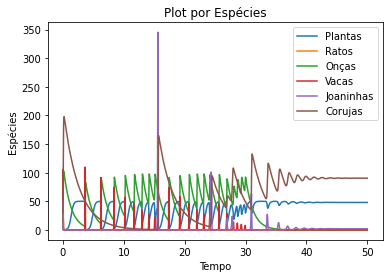

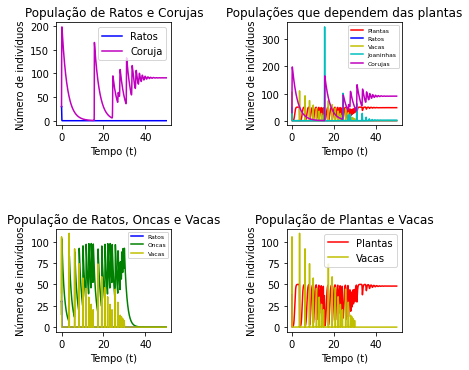

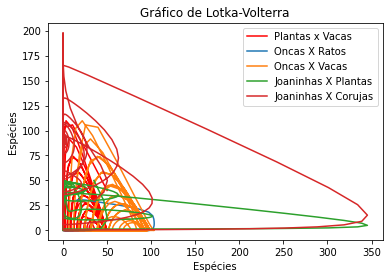

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

# N(t) número de indivíduos de uma população em função do tempo
# Considera que a população cresce a uma razão Alpha na ausência de fatores limitantes
# P é a ppulação de predadores

i = 0
t = 5000  # tempo
k = 200  # representa a capacidade de suporte do ambiente (saturação)
deltaT = 0.01
T = np.arange(0, t * 0.01, deltaT)


class Especie:
    def __init__(self, N, p=None, k=None):
        self.N = N
        self.p = p
        self.k = k
        self.vetor = [N]

class Plots:
    def __init__(self, plantas=None, rato=None, oncas=None, vacas=None, joaninhas=None, coruja=None):
        self.plantas = plantas
        self.rato = rato
        self.oncas = oncas
        self.vacas = vacas
        self.joaninhas = joaninhas
        self.coruja = coruja

    def individuosPeloTempo(self, plantas=None, rato=None, oncas=None, vacas=None, joaninhas=None, coruja=None):
        """
        Plota o gráfico de N(t)
        """
        # Plota o gráfico de cada indivíduo em função do tempo
        plt.plot(T, plantas, label='Plantas')
        plt.plot(T, rato, label='Ratos')
        plt.plot(T, oncas, label='Onças')
        plt.plot(T, vacas, label='Vacas')
        plt.plot(T, joaninhas, label='Joaninhas')
        plt.plot(T, coruja, label='Corujas')
        plt.xlabel('Tempo')
        plt.ylabel('Espécies')
        plt.title("Plot por Espécies")
        plt.legend()

    def PlotGeral(self, plantas=None, rato=None, oncas=None, vacas=None, joaninhas=None, coruja=None):
        fig, ax = plt.subplots(2, 2)

        ax[0, 0].plot(T, rato, 'b', label='Ratos')
        ax[0, 0].plot(T, coruja, 'm', label='Coruja')
        ax[0, 0].set_xlabel('Tempo (t)')
        ax[0, 0].set_ylabel('Número de indivíduos')
        ax[0, 0].legend()
        ax[0, 0].set_title('População de Ratos e Corujas')

        ax[0, 1].plot(T, plantas, 'r', label='Plantas')
        ax[0, 1].plot(T, rato, 'b', label='Ratos')
        ax[0, 1].plot(T, vacas, 'y', label='Vacas')
        ax[0, 1].plot(T, joaninhas, 'c', label='Joaninhas')
        ax[0, 1].plot(T, coruja, 'm', label='Corujas')
        ax[0, 1].set_xlabel('Tempo (t)')
        ax[0, 1].set_ylabel('Número de indivíduos')
        ax[0, 1].legend(loc = 'upper right', fontsize=6)
        ax[0, 1].set_title('Populações que dependem das plantas')

        ax[1, 0].plot(T, rato, 'b', label='Ratos')
        ax[1, 0].plot(T, oncas, 'g', label='Oncas')
        ax[1, 0].plot(T, vacas, 'y', label='Vacas')
        ax[1, 0].set_xlabel('Tempo (t)')
        ax[1, 0].set_ylabel('Número de indivíduos')
        ax[1, 0].legend(loc = 'upper right', fontsize=6)
        ax[1, 0].set_title('População de Ratos, Oncas e Vacas')

        ax[1, 1].plot(T, plantas, 'r', label='Plantas')
        ax[1, 1].plot(T, vacas, 'y', label='Vacas')
        ax[1, 1].set_xlabel('Tempo (t)')
        ax[1, 1].set_ylabel('Número de indivíduos')
        ax[1, 1].legend()
        ax[1, 1].set_title('População de Plantas e Vacas')
        plt.subplots_adjust(wspace=1, hspace=1, top=1.2, right=0.9, left=0.1)
        plt.show()

    def Volterra(self, plantas=None, rato=None, oncas=None, vacas=None, joaninhas=None, coruja=None):
        """
        Plota o gráfico de LOTKA-VOLTERRA

        """

        plt.plot(plantas, vacas, 'r', label='Plantas x Vacas')
        plt.plot(oncas, rato, label='Oncas X Ratos')
        plt.plot(oncas, vacas, label='Oncas X Vacas')
        plt.plot(joaninhas, plantas, label='Joaninhas X Plantas')
        plt.plot(joaninhas, coruja, label='Joaninhas X Corujas')
        plt.xlabel('Espécies')
        plt.ylabel('Espécies')
        plt.title("Gráfico de Lotka-Volterra")
        plt.legend()


if __name__ == "__main__":

    # Cria o ambiente planta e seus coeficientes

    planta = {
        "planta": 5,
        "vaca": 0.7,
        "joaninha": 0.1,
        "rato": 0.3,
    }

    plantas = Especie(N=50, p=[planta.get("planta"), planta.get(
        "vaca"), planta.get("joaninha"), planta.get("rato")], k=50)

    # Cria a espécie dos ratos e seus coeficientes

    ratos = {
        "rato": 0.8,
        "planta": 0.15,
        "onça": 0.09,
        "coruja": 0.09,
    }

    rato = Especie(N=30, p=[ratos.get("rato"), ratos.get(
        "planta"), ratos.get("onça"), ratos.get("coruja")], k=30)

    # Cria a espécie coelhos e seus coeficientes

    onca = {
        "onca": 0.8,
        "vaca": 0.5,
        "rato": 0.1,
    }

    oncas = Especie(N=15, p=[onca.get("onca"), onca.get(
        "vaca"), onca.get("rato")], k=15)

    # Cria a espécie das vacas e seus coeficientes

    vaca = {
        "vaca": 0.8,
        "planta": 2,
        "onça": 0.9,
    }

    vacas = Especie(N=40, p=[vaca.get("vaca"), vaca.get(
        "planta"), vaca.get("onça")], k=40)

    # Cria a espécie joaninha e seus coeficientes

    joaninhas = {
        "joaninha": 0.4,
        "planta": 0.95,
        "coruja": 0.5,
    }

    joaninha = Especie(N=35, p=[joaninhas.get("joaninha"), joaninhas.get(
        "planta"), joaninhas.get("coruja")], k=35)

    # Cria a espécie Passáro e seus coeficientes

    corujas = {
        "coruja": 0.4,
        "joaninha": 0.2,
        "rato": 0.7,
    }

    coruja = Especie(N=30, p=[corujas.get("coruja"), corujas.get(
        "joaninha"), corujas.get("rato")], k=30)

    while(i < t-1):
        i += 1

        plantas.N = plantas.vetor[i - 1] + plantas.vetor[i - 1] * (plantas.p[0] * (1 - plantas.vetor[i - 1] / plantas.k) -
                                                                   plantas.p[1]*vacas.vetor[i - 1] - plantas.p[2]*joaninha.vetor[i - 1] - plantas.p[3] * rato.vetor[i - 1]) * deltaT

        if (plantas.N < 0):
            plantas.N = 0

        plantas.vetor.append(plantas.N)

        rato.N = rato.vetor[i-1] + rato.vetor[i-1] * (rato.p[1] * plantas.vetor[i - 1] - rato.p[2] * oncas.vetor[i - 1] - rato.p[3] * coruja.vetor[i - 1] - rato.p[0]) * deltaT

        if (rato.N < 0):
            rato.N = 0

        rato.vetor.append(rato.N)

        oncas.N = oncas.vetor[i-1] + oncas.vetor[i-1] * (oncas.p[1] * vacas.vetor[i - 1] + oncas.p[2] * rato.vetor[i - 1] - oncas.p[0]) * deltaT

        if (oncas.N < 0):
            oncas.N = 0

        oncas.vetor.append(oncas.N)

        
        vacas.N = vacas.vetor[i-1] + vacas.vetor[i-1] * (vacas.p[1] * plantas.vetor[i - 1] - vacas.p[2]*oncas.vetor[i - 1] - vacas.p[0]) * deltaT

        if(i > 2000 and i < 4000 and i % 1000 == 0):
          vacas.N = vacas.N - (((-i/50))**2) 
        

        if (vacas.N < 0):
            vacas.N = 0

        vacas.vetor.append(vacas.N)

        joaninha.N = joaninha.vetor[i-1] + joaninha.vetor[i-1] * (
            joaninha.p[1] * plantas.vetor[i - 1] - joaninha.p[2] * coruja.vetor[i - 1] - joaninha.p[0]) * deltaT

        if (joaninha.N < 0):
            joaninha.N = 0

        joaninha.vetor.append(joaninha.N)


        coruja.N = coruja.vetor[i-1] + coruja.vetor[i-1] * (coruja.p[1] * joaninha.vetor[i - 1] + coruja.p[2]*rato.vetor[i - 1] - coruja.p[0]) * deltaT

        if (coruja.N < 0):
            coruja.N = 0        

        coruja.vetor.append(coruja.N)

    graficos = Plots()

    graficos.individuosPeloTempo(plantas=plantas.vetor, rato=rato.vetor, oncas=oncas.vetor,
                                 vacas=vacas.vetor, joaninhas=joaninha.vetor, coruja=coruja.vetor)

    graficos.PlotGeral(plantas=plantas.vetor, rato=rato.vetor, oncas=oncas.vetor,
                       vacas=vacas.vetor, joaninhas=joaninha.vetor, coruja=coruja.vetor)

    graficos.Volterra(plantas=plantas.vetor, rato=rato.vetor, oncas=oncas.vetor,
                      vacas=vacas.vetor, joaninhas=joaninha.vetor, coruja=coruja.vetor)

    plt.show()
    plt.close()

#Simulação com 2 espécies
Com o objetivo de analisar o gráfico de Lotka-Volterra, considerou-se somente 2 espécies, sendo uma produtora e outra consumidora primária, e plotou-se os gráficos para analisar o comportamento cíclico.

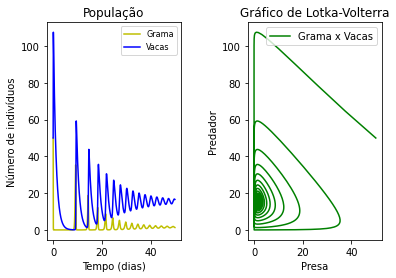

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

# N(t) número de indivíduos de uma população em função do tempo
# Considera que a população cresce a uma razão Alpha na ausência de fatores limitantes
# P é a ppulação de predadores

i = 0
t = 5000 # tempo
k = 200 # representa a capacidade de suporte do ambiente (saturação)
deltaT = 0.01
T = np.arange(0, t * 0.01, deltaT)     

class Especie:
    def __init__(self, N, p=None, k=None):
        self.N = N
        self.p = p
        self.k = k
        self.vetor = [N]

class Plots:
    def __init__(self, plantas=None, vacas=None):
        self.plantas = plantas
        self.vacas = vacas
    
    def PlotGeral(self, plantas=None, vacas=None):
        fig, ax = plt.subplots(1, 2)
        ax[0].plot(T, plantas, 'y', label='Grama')
        ax[0].plot(T, vacas, 'b', label='Vacas')
        ax[0].set_xlabel('Tempo (dias)')
        ax[0].set_ylabel('Número de indivíduos')
        ax[0].legend()
        ax[0].set_title('População')
        ax[0].legend(loc = 'upper right', fontsize=8)

        ax[1].plot(plantas, vacas, 'g', label='Grama x Vacas')
        ax[1].set_xlabel('Presa')
        ax[1].set_ylabel('Predador')
        ax[1].legend()
        ax[1].set_title('Gráfico de Lotka-Volterra')
        ax[1].legend(loc = 'upper right', fontsize=8)

        plt.subplots_adjust(wspace=0.5)

        plt.legend()
        plt.show()
    


if __name__ == "__main__":

    # Cria o ambiente planta e seus coeficientes

    plant = {
        "planta": 8,
        "vaca": 0.5
    }

    plantas = Especie(N=50, p=[plant.get("planta"), plant.get("vaca")], k=50)

    # Cria a espécie das vacas e seus coeficientes

    vaca = {
        "vaca": 0.9,
        "planta": 0.6
    }

    vacas = Especie(N=50, p=[vaca.get("vaca"), vaca.get("planta")])

    while(i < t-1):
        i += 1

        plantas.N = plantas.vetor[i - 1] + plantas.vetor[i - 1] * (plantas.p[0] * (1 - plantas.vetor[i - 1] / plantas.k) - plantas.p[1]*vacas.vetor[i - 1]) * deltaT

        if (plantas.N < 0):
            plantas.N = 0

        plantas.vetor.append(plantas.N)

        vacas.N = vacas.vetor[i-1] + vacas.vetor[i-1] * (vacas.p[1] * plantas.vetor[i - 1] - vacas.p[0]) * deltaT

        if (vacas.N < 0):
            vacas.N = 0

        vacas.vetor.append(vacas.N)

    graficos = Plots()
   
    graficos.PlotGeral(plantas=plantas.vetor, vacas=vacas.vetor)

    plt.show()

#Conclusão
A partir das análises gráficas e dos resultados das simulações obtidos, pode-se concluir que todas as espécies interagem direta ou indiretamente entre si. Pois, como foi possível observar, ao perturbar o ambiente, não só houve a diminuição da população de vacas, mas também de outras espécies, como por exemplo, as onças, que são predadoras das vacas, e das corujas, que mesmo não estando diretamente ligadas as vacas sofrem alteração após a extinção destas. Além disso, após a realização de diversas simulações, percebeu-se a grande importância que os ratos possuíam em toda a rede trófica, dada a sensibilidade de seus parâmetros, já que esses estão no centro da rede trófica, afetando grande parte desta. Em suma, após certa quantidade de tempo, se acertados os parâmetros, pode-se notar que as populações tendem a certo equilíbrio, a despeito de quaisquer perturbações.